# **CIKG** Proof of Concept
**_Example on MNIST dataset_**

This notebook provides a proof of concept for the CIKG framework under the following assumptions:

- The domain of interest of all the involved classifiers is defined by the MNIST Dataset;

- The set of Machine Learning models is composed by 10 classifiers: one per each digit of the MNIST dataset, i.e., one classifier that recognizes zeroes, one that recognizes ones, and so on;

- The Ontology alphabet contains exactly one unary predicate per each digit (Zero, One, Two, ..., Nine), and the logical theory is empty, i.e. there are no axioms in the ontology;

- The interpretation of each unary predicate is defined by the corresponding classifier (?)

In this notebook, we investgate the problem of query answering in two different scenarios: one in which the classifiers are Single-Layer Perceptrons (SLPs), and one in which they are Multi-Layer Percepotrons (MLPs).

The presented experiments are structured as follows:

1. Load 10 SLPs and 10 MLPs for the MNIST classification problem (pre-trained through scr/training-script.py)

2. Define the queries and compute an answer for them

# Load the models

In [1]:
from src.solver import *
from src.train import *
import time

In [2]:
device = detectDevice()
[test_dataset, test_loader, posTests] = setTestDatasets()
[train_dataset, train_loader] = setTrainDatasets()

Using PyTorch version: 2.7.0+cu128
Using GPU, device name: NVIDIA T550 Laptop GPU


loaded classifier model for 0
loaded classifier model for 1
loaded classifier model for 2
loaded classifier model for 3
loaded classifier model for 4
loaded classifier model for 5
loaded classifier model for 6
loaded classifier model for 7
loaded classifier model for 8
loaded classifier model for 9
summary classifier model for 0
accuracy: 0.9871, recall: 0.9887755102040816


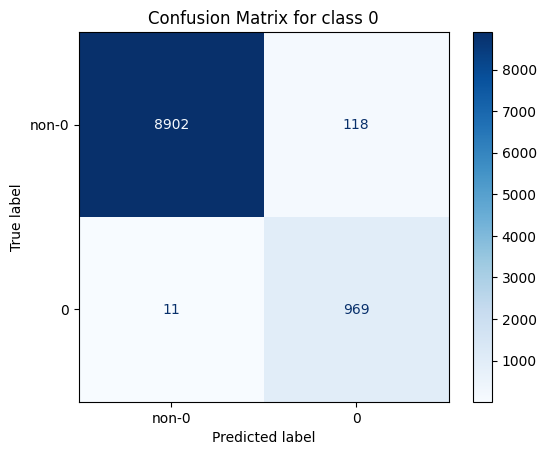

summary classifier model for 1
accuracy: 0.9867, recall: 0.9903083700440528


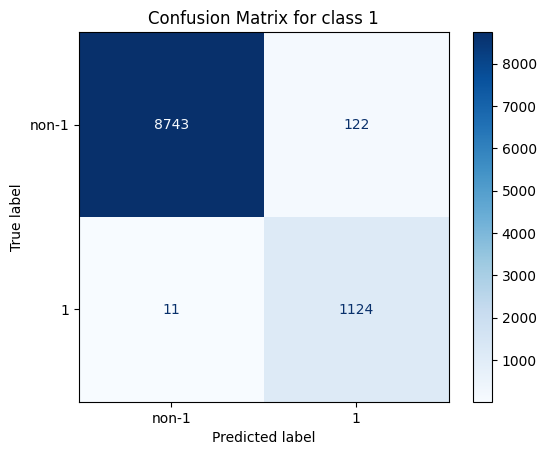

summary classifier model for 2
accuracy: 0.9681, recall: 0.9302325581395349


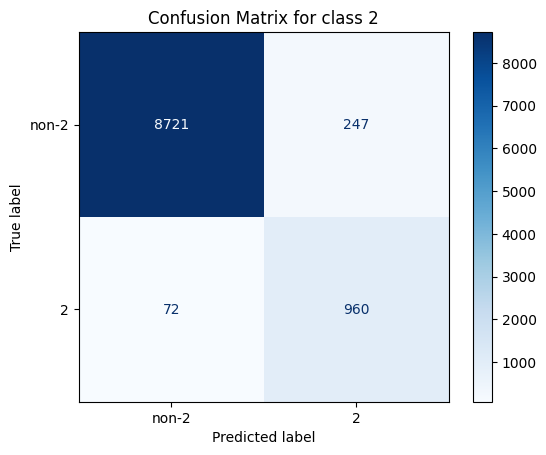

summary classifier model for 3
accuracy: 0.9428, recall: 0.9514851485148514


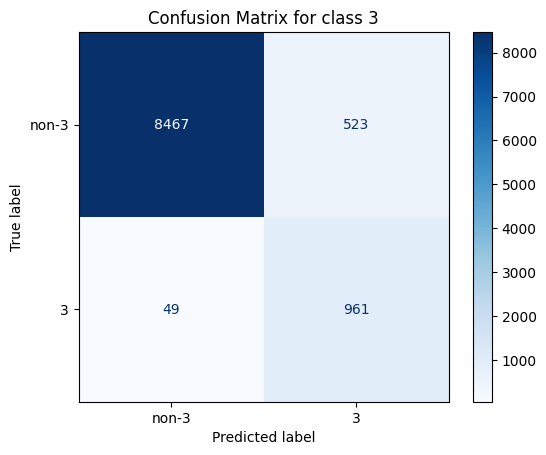

summary classifier model for 4
accuracy: 0.9656, recall: 0.9775967413441955


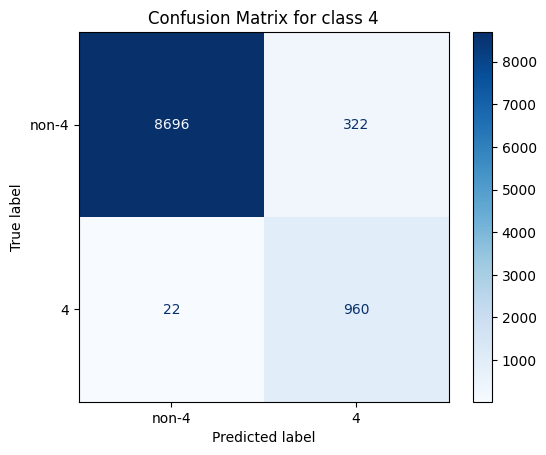

summary classifier model for 5
accuracy: 0.9361, recall: 0.9304932735426009


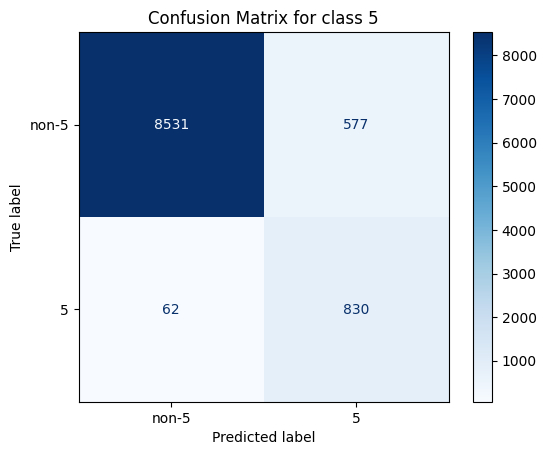

summary classifier model for 6
accuracy: 0.9717, recall: 0.9749478079331941


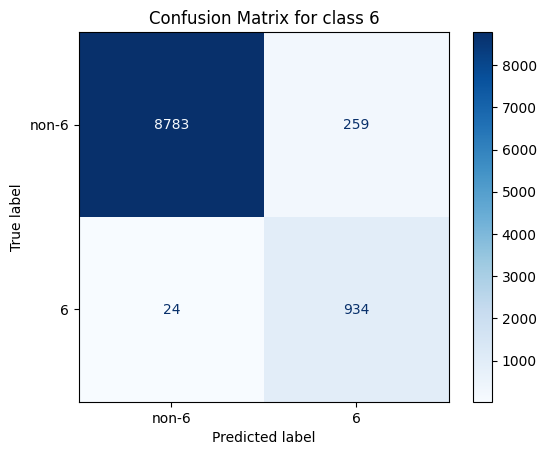

summary classifier model for 7
accuracy: 0.9682, recall: 0.9571984435797666


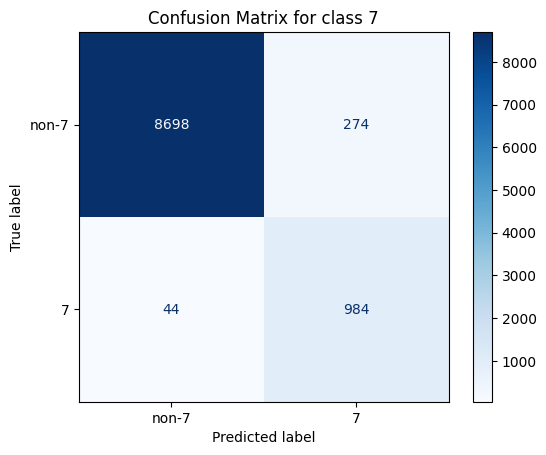

summary classifier model for 8
accuracy: 0.8979, recall: 0.919917864476386


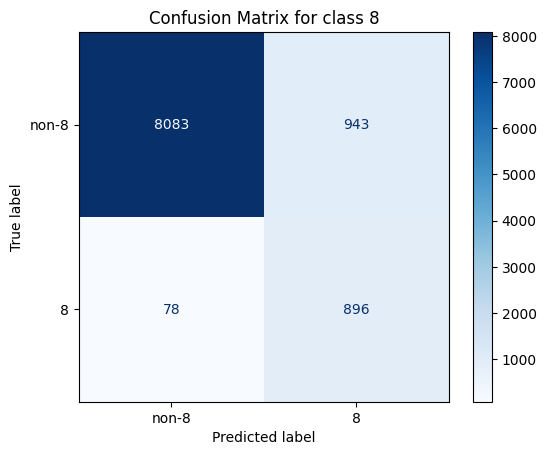

summary classifier model for 9
accuracy: 0.9143, recall: 0.9494549058473737


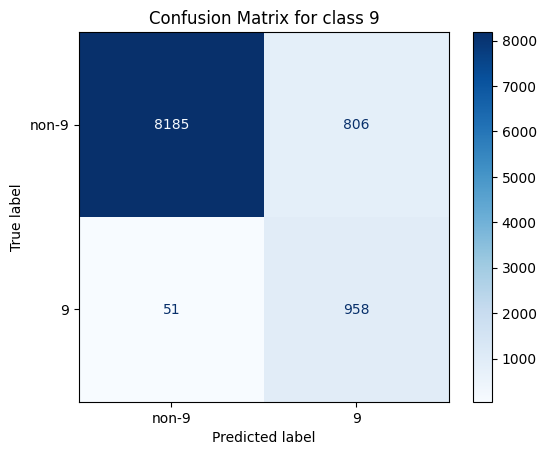

Average accuracy: 0.9538500000000001, Average recall: 0.9570410623626039


In [3]:
SLPmodels = loadModels('SLP', device)
testModels(SLPmodels, test_loader, device)

loaded classifier model for 0
loaded classifier model for 1
loaded classifier model for 2
loaded classifier model for 3
loaded classifier model for 4
loaded classifier model for 5
loaded classifier model for 6
loaded classifier model for 7
loaded classifier model for 8
loaded classifier model for 9
summary classifier model for 0
accuracy: 0.9941, recall: 0.986734693877551


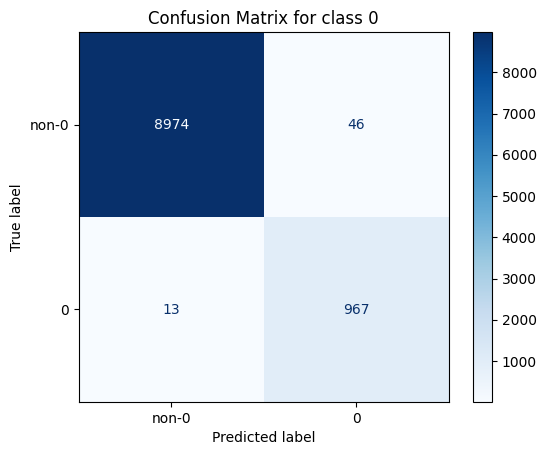

summary classifier model for 1
accuracy: 0.9968, recall: 0.986784140969163


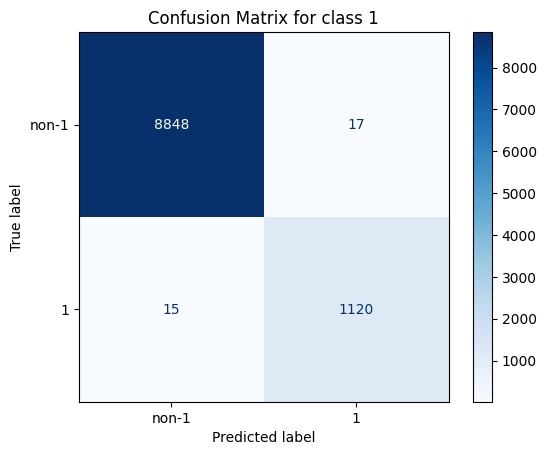

summary classifier model for 2
accuracy: 0.9917, recall: 0.9738372093023255


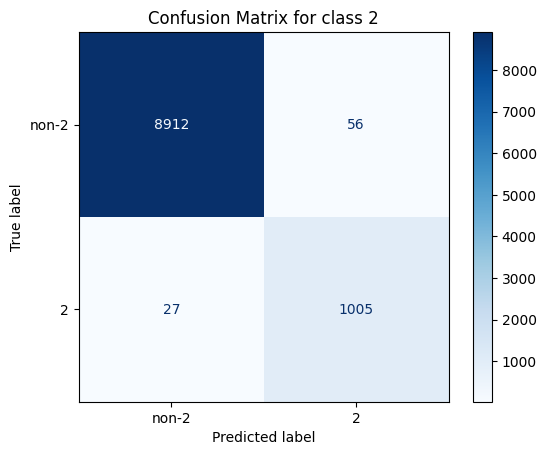

summary classifier model for 3
accuracy: 0.9891, recall: 0.9772277227722772


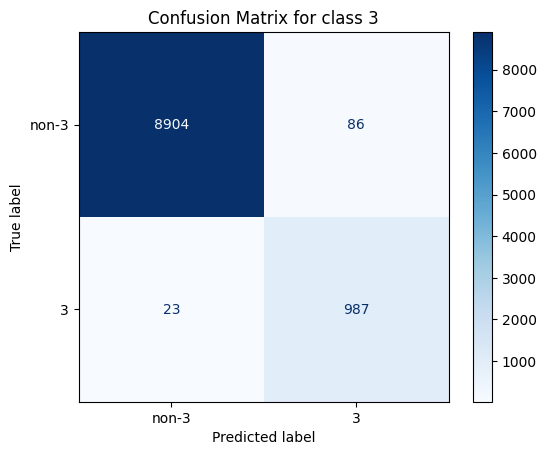

summary classifier model for 4
accuracy: 0.9927, recall: 0.9796334012219959


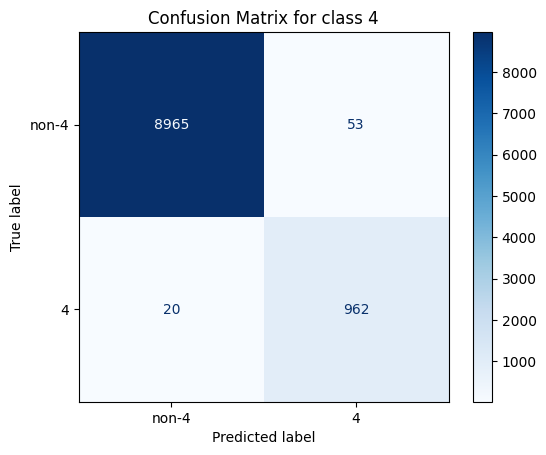

summary classifier model for 5
accuracy: 0.9921, recall: 0.9775784753363229


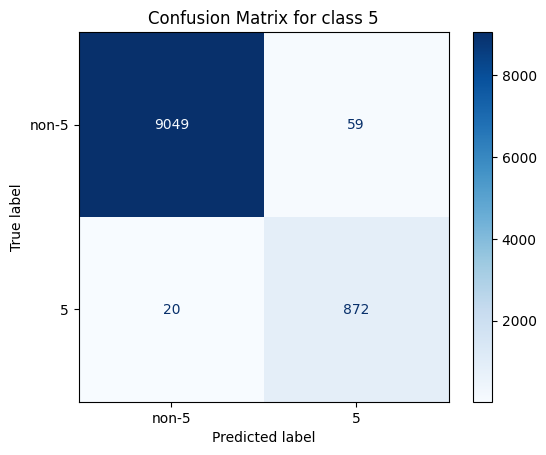

summary classifier model for 6
accuracy: 0.9933, recall: 0.9853862212943633


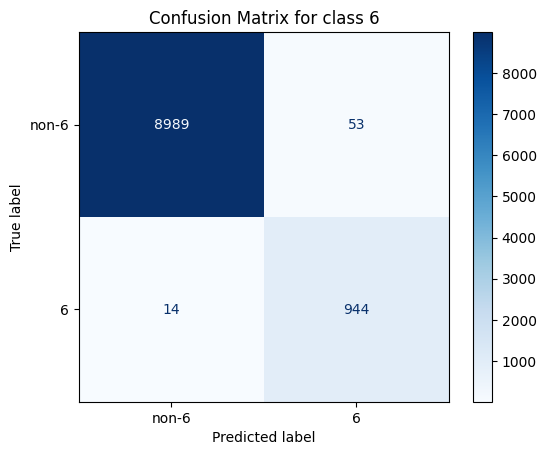

summary classifier model for 7
accuracy: 0.9831, recall: 0.9815175097276264


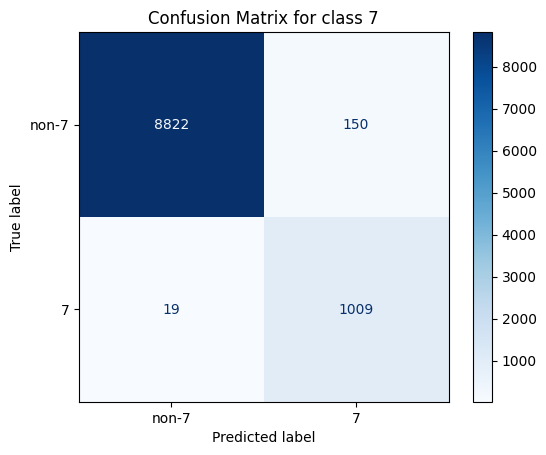

summary classifier model for 8
accuracy: 0.9853, recall: 0.973305954825462


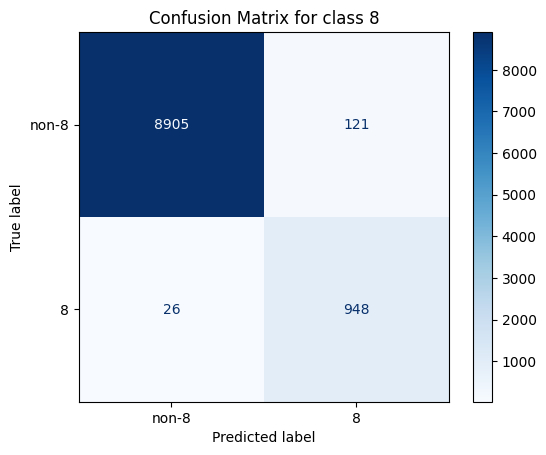

summary classifier model for 9
accuracy: 0.9877, recall: 0.9672943508424182


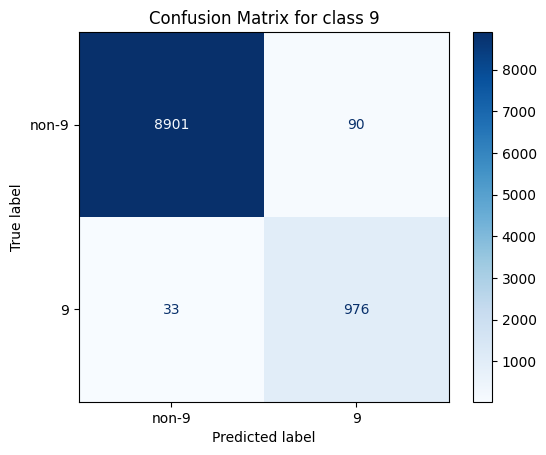

Average accuracy: 0.9905899999999999, Average recall: 0.9789299680169506


In [5]:
MLPmodels = loadModels('MLP', device)
testModels(MLPmodels, test_loader, device)

# Query the models

In [8]:
for model in SLPmodels:
    start_time = time.time()

    q = [model]
    checkSLP(q, needWitness=False)
    
    end_time = time.time()
    print(end_time-start_time)
    

sat
0.37814998626708984
sat
0.2535879611968994
sat
0.27119874954223633
sat
0.28849053382873535
sat
0.2862203121185303
sat
0.25393247604370117
sat
0.2969200611114502
sat
0.25151681900024414
sat
0.268878698348999
sat
0.2706477642059326


In [9]:
q = []
for model in SLPmodels:

    start_time = time.time()

    q.append(model)
    checkSLP(q, needWitness=False)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Query with {len(q)} models: {elapsed_time:.4f} sec")

sat
Query with 1 models: 0.3295 sec
sat
Query with 2 models: 0.5649 sec
sat
Query with 3 models: 1.3604 sec
sat
Query with 4 models: 2.8364 sec
sat
Query with 5 models: 2.8301 sec
sat
Query with 6 models: 15.9292 sec
sat
Query with 7 models: 14.5344 sec
sat
Query with 8 models: 15.9383 sec
sat
Query with 9 models: 17.6870 sec
sat
Query with 10 models: 41.4718 sec
